# Day 3

### Topics

1. Bit of a review
1. Functions
1. Reading & Writing data in general
1. Reading in data with Pandas

## Bit of a review

Last time we talked a bit about doing for loops and if-then statements and used them to plot.

In [113]:
import numpy as np
import matplotlib.pyplot as plt

Let's plot some random numbers, and let's do it 3 times:

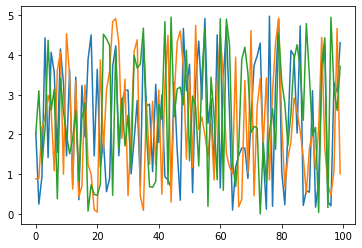

In [114]:
x = np.arange(100) # see HW

for i in range(3):
    y = np.random.random(100)*5 # random numbers from 0-5
    plt.plot(x,y)
    
plt.show()

Let's mark one of them specially using an if-statement:

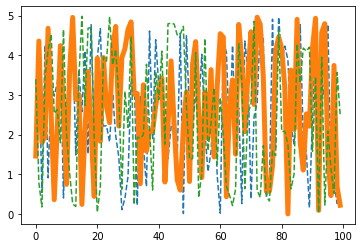

In [115]:
for i in range(3):
    y = np.random.random(100)*5 # random numbers from 0-5
    if i == 1:
        plt.plot(x,y, lw=5) # make a thick line
    else:
        plt.plot(x,y,'--') # otherwise, make dashed lines, default thickness
    
plt.show()

## BACK TO SLIDES TO TALK ABOUT FUNCTIONS

## Functions

Ok, now that we have the IDEA of functions, let's put them into practice.

We've actually be using functions this whole time!  Like our good friend print:

In [116]:
print("Hey I'm a printing function!  So cool!")

Hey I'm a printing function!  So cool!


How does a function show up in your code?  There are a few steps [[ref](https://github.com/elliewix/IS-452-Spring2020/blob/master/Lectures/Week-05-Functions.ipynb).]

This is a little life cycle of how a function will appear in your code.

A function will have three phases in your code. This doesn't mean that these phases are traversed in order and never revisited, but this is how your code will be structured.

 1. *Thinking* phase (for the humans)
    * This is another 'hands off the keyboard' phase where you sit and think through the reason behind the function. You need to think about the purpose of the function, names, and intended actions.
 1. *Defining* phase
    * This is where the function is defined in your code (and how to do that is the next section). Functions are usually defined in the beginning or your script, although this isn't required. You're going to write code according to the specifications that you determined in phase 1. Well, there will be more questions you can't ask until you start the coding process, but the larger questions need to be answered in phase 1 before getting here.
    * Once a function is defined, Python justs knows about it and what it does. None of the code inside of it has been executed yet.
    * This definition must happen before you call the function. The exception to this is when you may have multiple function definitions, which we are not at yet and will not discuss further.
 1. *Calling* phase
    * Now that Python has learned about the function, you can make it actually execute the code. You do this by calling the function. Calling a function must come after you have defined it.
    
There are entire books around how to format and design functions. I'm going to give you some clear starter directions that will serve you well for this class, but be prepared as you keep going in python that you'll see some other traditions. There are many potential cool things you can do with functions, but it's best to start off simple. Then we can explore extra goodies.

Now we well get into the business of defining and calling our own functions.  Let's design a function that will print out the phrase "hi there" 5 times, and lets call it myPrint.  Let's write it down:

In [117]:
def myPrint():
    for i in range(5): # hey look!  an excuse to use a for-loop!
        print("hi there")

You'll note that when we run this cell, nothing happens.  This is because we've only done the *Thinking* and *Defining* parts of the function.  Now we will *Call* the function and something will happen:

In [118]:
myPrint()

hi there
hi there
hi there
hi there
hi there


Boom!  There it is!  So, one thing we naturally might naturally want to do is allow for different numbers of our phrase to be printed out.  We can do this by adding in an *argument* to our function that allows us to pass a *parameter* which will tell us how many times to print something out:

In [119]:
def myPrint(numPrints):
    for i in range(numPrints): # hey look!  an excuse to use a for-loop!
        print("hi there")

Again, note that nothing happens when we run this cell because we have only defined, not called our function.

In [120]:
myPrint(10)

hi there
hi there
hi there
hi there
hi there
hi there
hi there
hi there
hi there
hi there


Great!  Finally, we can have our function not only *do* something, but actually *return* us something that we can use later.  You can see the difference here, for example with the `print` function that only *does* something:

In [121]:
print('hello!')

hello!


Vs a function that *returns* values, like NumPy's absolute value function:

In [122]:
myAbs = np.abs(-5)
myAbs

5

We can store the output of the `np.abs` function in a variable called `myAbs` and use it later.  

Let's make our `myPrint` function output how many times it has printed our phrase:

In [123]:
def myPrint(numPrints):
    for i in range(numPrints): # hey look!  an excuse to use a for-loop!
        print("hi there")
    return numPrints # note the indent "outside" of the for-loop!

Calling:

In [124]:
numberOfPrints = myPrint(10)

hi there
hi there
hi there
hi there
hi there
hi there
hi there
hi there
hi there
hi there


In [125]:
numberOfPrints

10

In the above case, our function both *did something* and *returned something*.

Note there are a TON of extra resources on functions, I've linked a few in the optional reading for this week, so feel free to check them out to help you conceptually work through how to think about designing functions.



Another thing you'll sometimes see are things called "optional" parameters.  These come into the function definition with a "=".  Let's put in an optional boolean variable that will toggle if we do all of our prints in uppercase or not:

In [1]:
def myPrint(numPrints, upperCase = False): # we'll default to NOT doing upper case
    for i in range(numPrints): # hey look!  an excuse to use a for-loop!
        if upperCase:
            print("hi there".upper())
        else:
            print("hi there")
    return numPrints # note the indent "outside" of the for-loop!

Now we can choose to call as normal with the default of *NO* upper case:

In [2]:
numberOfPrints = myPrint(10)

hi there
hi there
hi there
hi there
hi there
hi there
hi there
hi there
hi there
hi there


But we can also choose to do things in upper case instead:

In [3]:
numberOfPrints = myPrint(10, upperCase = True)

HI THERE
HI THERE
HI THERE
HI THERE
HI THERE
HI THERE
HI THERE
HI THERE
HI THERE
HI THERE


## BACK TO SLIDES FOR DATA STORAGE

## Reading & Writing data in general

While we will make use of packages like Pandas to read in data, its important to get a bit of an idea of how some of the "built-in" Python functions work to read in data.  We'll just touch on "reads" and then move onto Pandas.

An extensive amount of info can be found here: https://github.com/elliewix/IS-452-Spring2020/blob/master/Lectures/Week-06-ReadingFiles.ipynb

Whenever we are dealing with files we need to explicitly open them before we can read or write to them.  Because we don't have a file yet, we'll start with writing a file, so we'll have to open the file and let Python know we will be writing to this file:

In [126]:
myFile = open('myTextFile.txt', 'w') 

**NOTE:** if you are on a Windows machine you may have to do 'wb' and you *may* have to add `encoding="utf-8"`, so your call will look like:

```python
myFile = open('myTextFile.txt', 'wb', encoding="utf-8")
```

Now we have this file object in our environment and we can write to it.  There are a few ways we can do this, but for now, we can just send something to a file in a print statement:

In [127]:
print?

In [128]:
print('Hey there!', file=myFile)

Now we can see that we didn't get an output to our screen, it actually got stored to a file.

HOWEVER, we are not done!  To finish the writing-to-a-file process we have to close our file, otherwise we'll be in trouble:

In [129]:
myFile.close()

We can now navigate to our current folder and see that there is a file named "myTextFile.txt"!  Neat!

Let's now read in our file, which will look similar to writing to this file:

In [130]:
myReadFile = open('myTextFile.txt', 'r') # see r instead of w, might need to do the 'wb' & encoding stuff

Now, instead of printing something to this file (we can't anyway since its been opened in read mode), we'll read in lines with the `.read` function:

In [131]:
textIn = myReadFile.read()
myReadFile.close() # don't forget to close!

Now we have our text stored in the `textIn` variable:

In [132]:
textIn

'Hey there!\n'

Note that there is this `\n` at the end - this is the character that denotes a new line.  For example:

In [133]:
print('Hi there.\n I am now a new line.\n So cool.')

Hi there.
 I am now a new line.
 So cool.


**Aside: Maybe skip read/write**

You can see the line breaks!  When printing to a file there is a trailing newline appended by default.  We can see this by writing what we just did to a file and reading it in again:

In [134]:
myFile = open('myNewText.txt', 'w')
print('Hi there.\n I am now a new line.\n So cool.', file=myFile)
myFile.close()

In [135]:
myReadFile = open('myNewText.txt', 'r')
textIn = myReadFile.read()
myReadFile.close()

In [136]:
textIn

'Hi there.\n I am now a new line.\n So cool.\n'

In [137]:
print(textIn)

Hi there.
 I am now a new line.
 So cool.



A few parting notes before we move on to some other packages that will do some of this open/reading/closing/formatting for us:

* be sure you close your files!  Writing does not happen until close.
* If you set a 'w'-write format to a file that already exists you'll overwrite it
* `.read` reads in everything, so if its a large file and you try to read it all into memory you can get into trouble!

## Reading in data with Pandas

Now we'll use a package called Pandas to read in tabular data and do stuff with it!  

You can use Pandas to read in data that you have stored locally, OR you can read in data that is stored remotely.

In [138]:
import pandas as pd # another often used shorthand

We'll use the GDP dataset to do both, let's start with remotely:

In [139]:
gdp = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/spring2020/master/week01/data/GDP.csv")

Let's take a look at our data!  There are a few ways to do this.  Let's look at the default print out with:

In [140]:
gdp

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
286,2018-07-01,20749.752
287,2018-10-01,20897.804
288,2019-01-01,21098.827
289,2019-04-01,21340.267


So we see that we get a nice formatted table of our data with indicies, a DATE and a GDP number.  For reference this is from the [FRED](https://fred.stlouisfed.org/) database.  If we check out this database we can see that the units of GDP are Billions.  

This `gdp` object is called a *dataframe* and this name will pop up a bunch in the data science fields.

Let's look at a few other ways to look at our data.  First, we can just look at the header of our data:

In [141]:
gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


We can also look at individual rows by using `.iloc`:

In [142]:
gdp.iloc[4]

DATE    1948-01-01
GDP        265.742
Name: 4, dtype: object

We can see this gave us all the info from the 5th row (index 4).

We can also print out some summary stats:

In [143]:
gdp.describe()

,GDP
count,291.000000
mean,6143.539148
std,6239.154340
min,243.164000
25%,723.990500
50%,3578.848000
75%,10597.058000
max,21542.540000


We can see that it gives us info about the stats of the GDP, but ignores the data (what is an "average" date anyway?).

**NOTE:** this will not always be the case!  Sometimes if you have numerical data like zipcodes it will still give you stats about it even though there isn't something like an "average" zipcode.

Another useful thing can sometimes be `.info` but it can also give you *too* much info.  Let's still take a look at it anyways:

In [144]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    291 non-null    object 
 1   GDP     291 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


We can also print out what columns we have:

In [145]:
gdp.columns

Index(['DATE', 'GDP'], dtype='object')

We can then use these names like we've been using indexes in NumPy arrays to plot things:

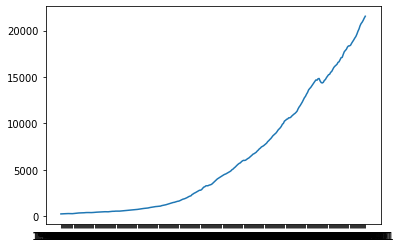

In [146]:
plt.plot(gdp['DATE'], gdp['GDP'])
plt.show()

So, that looks OK, but the data labels are probably not what we want -- a mess!  Let's change data-types into something that actually tracks dates correctly.

In [147]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])

Whoa what happened here?  Let's take a look:

In [148]:
gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


This looks nearly the same as before.  We can see a slight difference if we look at one row:

In [149]:
gdp.iloc[5]

DATE    1948-04-01 00:00:00
GDP                 272.567
Name: 5, dtype: object

So now we see a time of 00:00:00 associated with the DATE column.  This basically indicates that we have a "time-stamp" associated with this column now.

Ok, let's plot!

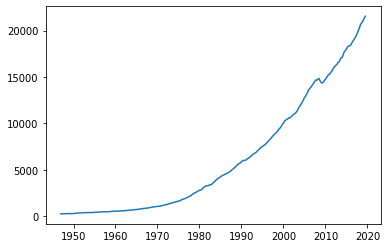

In [150]:
plt.plot(gdp['DATE'], gdp['GDP']) 
plt.show()

And let's add some axis labels for good measure:

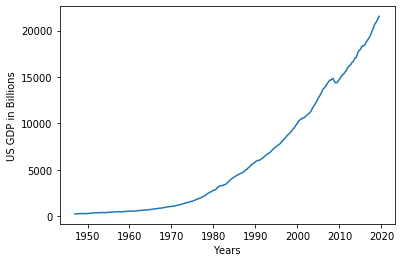

In [151]:
plt.plot(gdp['DATE'], gdp['GDP'])
plt.xlabel('Years')
plt.ylabel('US GDP in Billions')
plt.show()

There are also default plotting routines included with Pandas.  These are generally associated with the DataFrame object itself.  For example:

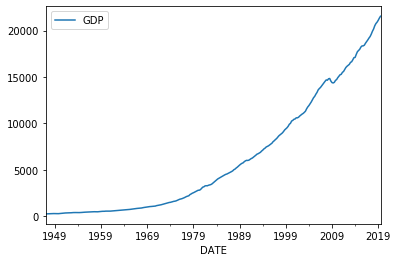

In [152]:
gdp.plot(x='DATE', y='GDP')

There are a few different options that we'll look at tomorrow:

In [153]:
gdp.plot?

Where is a good place to find data?  Sites like [Kaggle](https://kaggle.com) have large repositories of data that can be useful to use in testing out data viz.

This data is not without issue though.  Often times:
 * it is messy and hard to read into Python
 * if it has been "cleaned", often this is not well documented and it can be unclear how the data has been transformed
 * sources and methods of data collection, and therefore documentation of any biases in the data, can be lacking
 
Also, you will have to sign up for an account and that can be annoying.
 
Keeping all these issues in mind, we'll forge ahead with looking for some data, reading it in with Pandas, and plotting it.

First, let's filter by looking for data in CSV file format (other data format we can mess with later on, but let's keep going on this CSV train for now).

Let's try this dataset: https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

In [154]:
movies = pd.read_csv('~/Downloads/tv_shows.csv')

In [155]:
movies

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


Let's make a quick plot of the IMDb rating as a function of year using the Pandas `.plot` function:

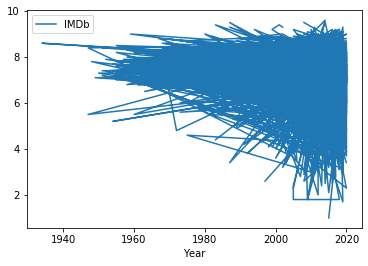

In [156]:
movies.plot(x='Year', y='IMDb')

Let's also try making a histogram:

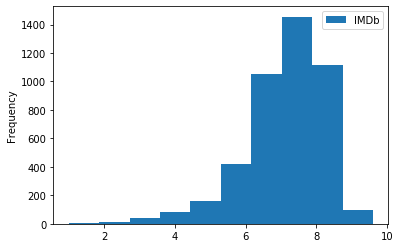

In [157]:
movies.plot(y='IMDb', kind='hist')

So we see that the average rating on IMDb is ~7.5-8 out of 10.

### Might not get to this until tomorrow...

What about trying to do the same thing for Rotten Tomatoes' ratings?

In [158]:
movies.plot(y='Rotten Tomatoes',  kind='hist')

TypeError: no numeric data to plot

Oop!  Looks like the the data type of the Rotten Tomatoes ratings is not numeric:

In [160]:
movies['Rotten Tomatoes'].dtype

dtype('O')

'O' means object and we want a float!

Googling: "from percentage to decimal pandas"

Gets: https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv

In [161]:
movies['Rotten Tomatoes'].str.rstrip('%').astype('float')/100

0       0.96
1       0.93
2       0.91
3       0.78
4       0.97
        ... 
5606     NaN
5607     NaN
5608     NaN
5609     NaN
5610     NaN
Name: Rotten Tomatoes, Length: 5611, dtype: float64

In [162]:
movies['Rotten Tomatoes Num'] = movies['Rotten Tomatoes'].str.rstrip('%').astype('float')/100

In [163]:
movies.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,Rotten Tomatoes Num
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1,0.96
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1,0.93
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1,0.91
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1,0.78
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1,0.97


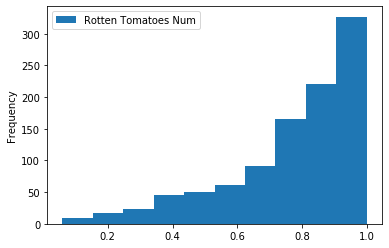

In [164]:
movies.plot(y='Rotten Tomatoes Num',  kind='hist')

TahDah!